## Startups

#### About the dataset

This dataset has the data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.
https://www.kaggle.com

In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [16]:
# Importing the dataset
startup = pd.read_csv('50_Startups.csv')

In [17]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
startup.shape

(50, 5)

In [19]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [20]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [21]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

### EDA

In [22]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


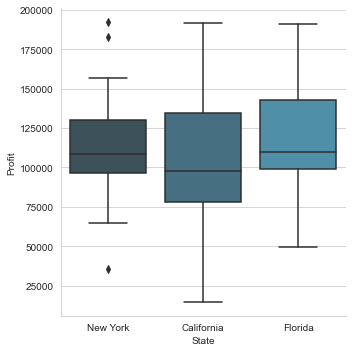

In [64]:
sns.catplot(x="State", y="Profit", kind="box", data=startup);
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

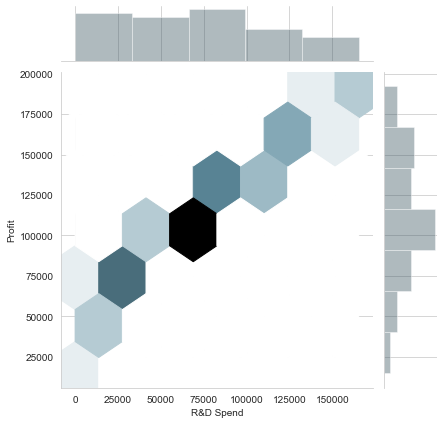

In [65]:
sns.jointplot(x='R&D Spend',y='Profit',kind='hex',data=startup)
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

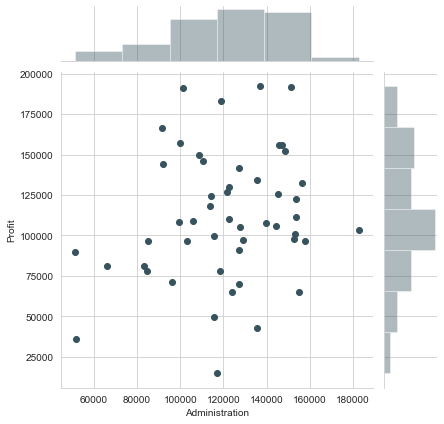

In [66]:
sns.jointplot(x='Administration',y='Profit',data=startup);

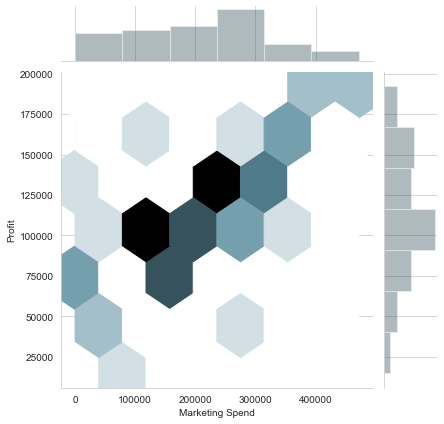

In [67]:
sns.jointplot(x='Marketing Spend',y='Profit',kind='hex',data=startup);

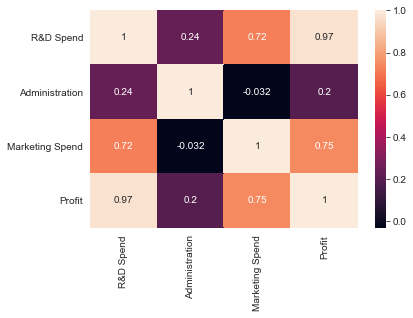

In [72]:
sns.heatmap(startup.corr(),annot=True);

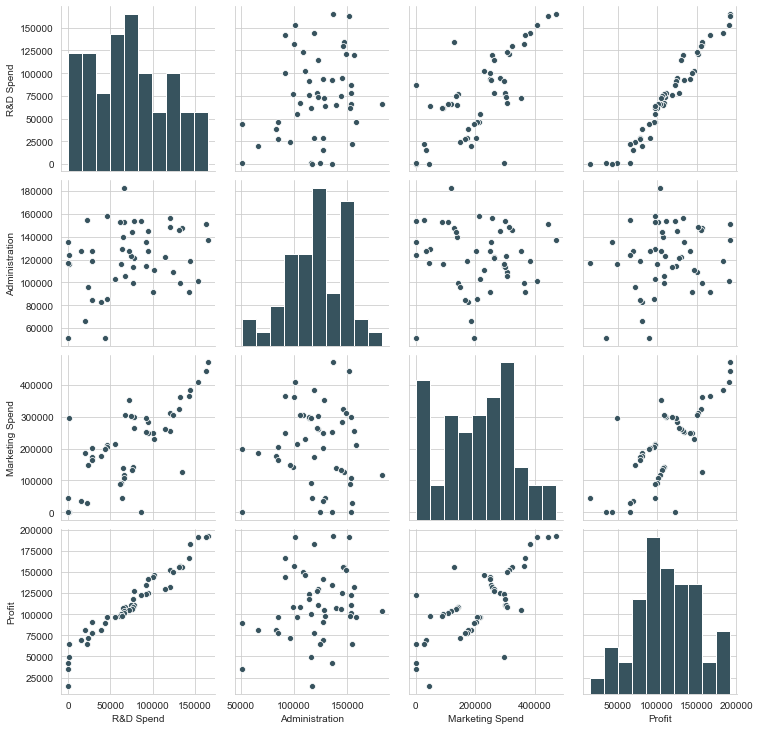

In [69]:
sns.pairplot(startup)

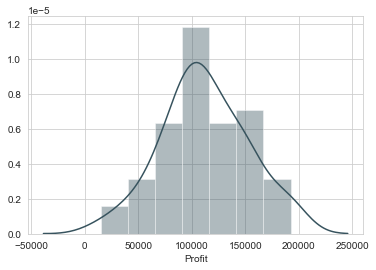

In [70]:
sns.distplot(startup['Profit']);

In [38]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [42]:
startups = pd.get_dummies(startup)

In [43]:
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Defining the Predictor and the Result variable

In [47]:
X=startups[['R&D Spend', 'Administration', 'Marketing Spend','State_California', 'State_Florida', 'State_New York']]
y=startups['Profit']

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


#### Train Test Split

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Setting test_size=0.3 and random_state=42**

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [49]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Checking whether the model is perfect / overfitted / underfitted. 

In [50]:
#  Training Score Linear Model
print("model score of trained set :",lm.score(X_train,y_train))

model score of trained set : 0.9511471170962384


In [51]:
# Test Score Linear Model
print("model score of test set :", lm.score(X_test,y_test))

model score of test set : 0.9397108063367285


#### Variation between the training and the testing  data seems to be minimal so I am not using **Regularisation Technique** for this project.

In [52]:
# Findig the Coeffients and the Intercept of this linear Model

In [53]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.804937
Administration,-0.091258
Marketing Spend,0.028067
State_California,259.028652
State_Florida,717.099427
State_New York,-976.128080


In [54]:
print('Intercept : ',lm.intercept_)

Intercept :  57153.61206156149


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [57]:
# Predicting the Test set results
predictions= lm.predict(X_test)

**scatterplot of the real test values versus the predicted values. **

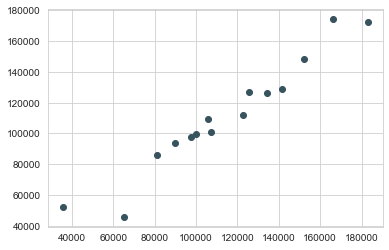

In [58]:
plt.scatter(y_test,predictions)
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**  Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [59]:
from sklearn import metrics

In [60]:
from sklearn import metrics
r2 = metrics.r2_score(y_test, predictions)
print("R2 :", metrics.r2_score(y_test, predictions))    

adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted r2 : " ,adj_r2 )

print('MAE  (Mean Absolute Error) :', metrics.mean_absolute_error(y_test, predictions))
print('MSE  (MeanSquared Error) :', metrics.mean_squared_error(y_test, predictions))
print('RMSE (Root Mean Squared Error) :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE (Mean Square Percentage Error)  :',np.mean(np.abs((y_test - predictions) / y_test)) * 100)

R2 : 0.9397108063367285
Adjusted r2 :  0.9267916934088847
MAE  (Mean Absolute Error) : 7395.433531438703
MSE  (MeanSquared Error) : 84826955.03371622
RMSE (Root Mean Squared Error) : 9210.154995097326
MAPE (Mean Square Percentage Error)  : 8.929865344026418


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Histogram of the residuals and to make sure it looks normally distributed. We will use seaborn distplot.**

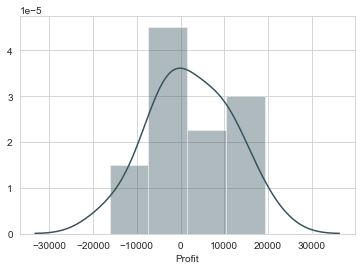

In [62]:
sns.distplot((y_test-predictions),bins=4);

## Conclusion

In [63]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.804937
Administration,-0.091258
Marketing Spend,0.028067
State_California,259.028652
State_Florida,717.099427
State_New York,-976.128080


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **R&D Spend** is associated with an **increase of 0.804937 total dollars of profit**.
- Holding all other features fixed, a 1 unit increase in **Administration** is associated with an **decrease of 0.091258 total dollars of profit**.
- Holding all other features fixed, a 1 unit increase in **Marketing Spend** is associated with an **increase of 0.028067 total dollars of profit**.
- Holding all other features fixed, a 1 unit increase(Sartups) in **State_California** is associated with an **increase of 259.028652 total dollars of profit**.
- Holding all other features fixed, a 1 unit increase(Sartups) in **State_Florida** is associated with an **increase of 717.099427 total dollars of profit** 
- Holding all other features fixed, a 1 unit increase(Sartups) in **State_New York** is associated with an **decrease of 976.128080 total dollars of profit**